In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


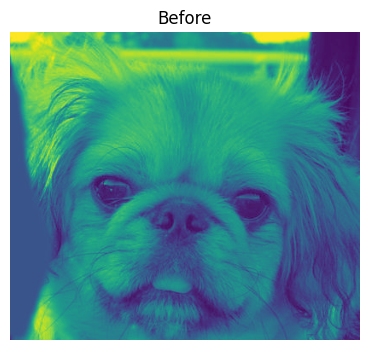

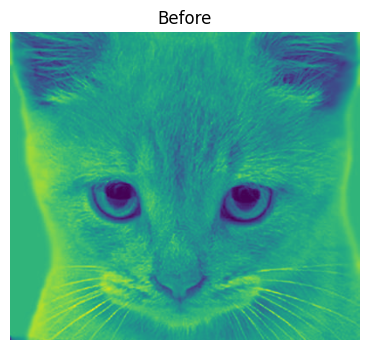

In [ ]:
#Uploading the image files
doggo= Image.open('/content/dog_gray.jpg')
meow=Image.open('/content/cat_gray.jpg')

plt.figure(figsize=(6, 4))
plt.imshow(doggo)
plt.title("Before")
plt.axis('off')
plt.show()

plt.figure(figsize=(6, 4))
plt.imshow(meow)
plt.title("Before")
plt.axis('off')
plt.show()

#Converting to grayscale( although it is already in grayscale yet to standardise it)
doggo_gray = doggo.convert('L')
meow_gray = meow.convert('L')




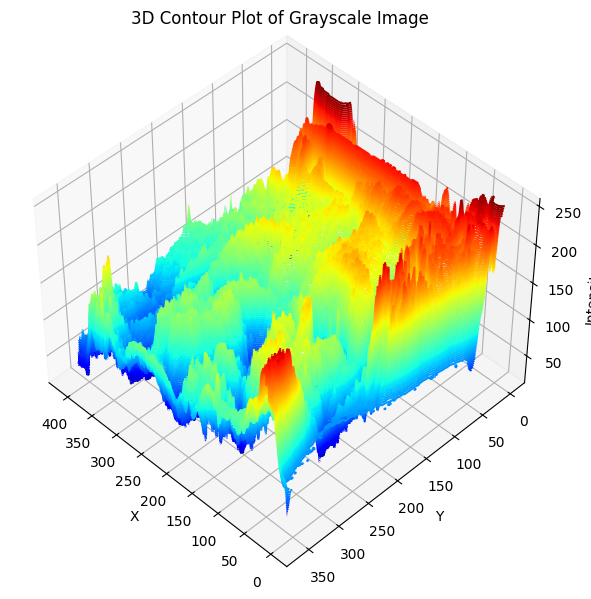

In [ ]:
#To show how pixels of the dog image have different values and this consitutes a signal

import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
img = np.array(doggo_gray)
x = np.arange(0, img.shape[1])
y = np.arange(0, img.shape[0])
x, y = np.meshgrid(x, y)

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot contour in 3D
ax.contour3D(x, y, img, 100, cmap='jet')  # 50 contours, colormap 'jet'
ax.set_title('3D Contour Plot of Grayscale Image')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Intensity')
ax.view_init(elev=45, azim=135)
plt.show()

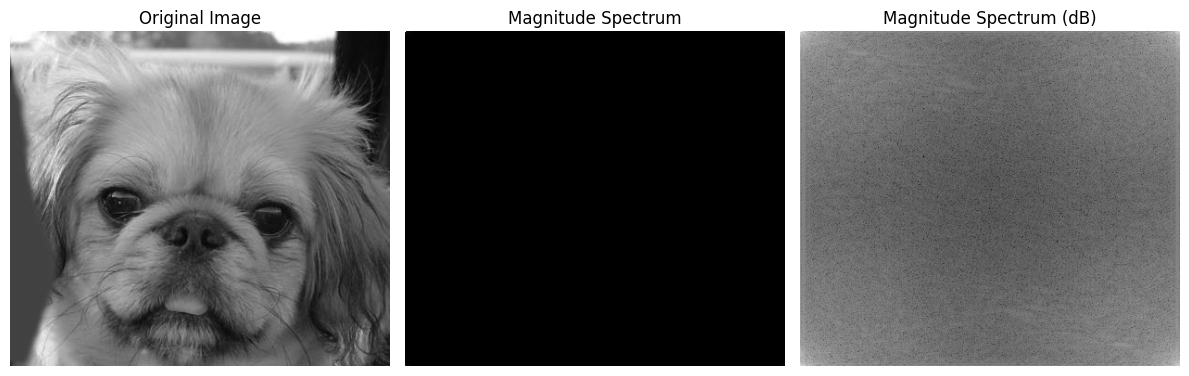

In [ ]:
#Say I choose doggo for calculating the 2D Fourier transform and this is before shifting centre of spectrum

#Applying fast fourier transform

fdog = np.fft.fft2(doggo_gray)

#Creating magnitude spectrum array
magnitude_spectrum = np.abs(fdog)

#Changing to decibel scale
magnitude_spectrum_db = 20 * np.log10(magnitude_spectrum + 1e-8)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(doggo_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum")
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Magnitude Spectrum (dB)")
plt.imshow(magnitude_spectrum_db, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


#The fourier image shows nothing because the lower frequencies with the higher magnitudes are at the edges

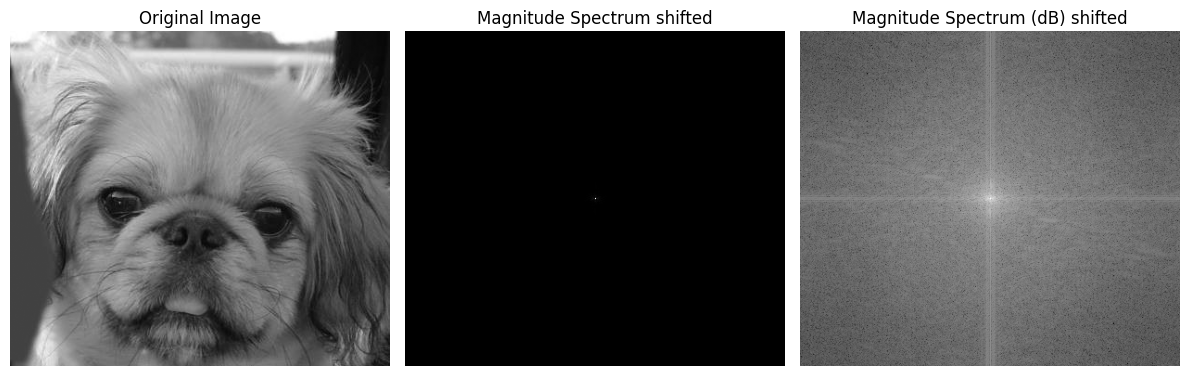

In [ ]:
#Now I shift the lower frequencies towards the centre of the spectrum

fshift = np.fft.fftshift(fdog)

magnitude_spectrum_shifted = np.abs(fshift)
magnitude_spectrum_db_shifted = 20 * np.log10(magnitude_spectrum_shifted + 1e-8)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(doggo_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum shifted")
plt.imshow(magnitude_spectrum_shifted, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Magnitude Spectrum (dB) shifted")
plt.imshow(magnitude_spectrum_db_shifted, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

#The fourier image now shows a white dot at the centre representing the mean value of the intensity and when converted to logarithmic scale it gives a visually meaningful image.

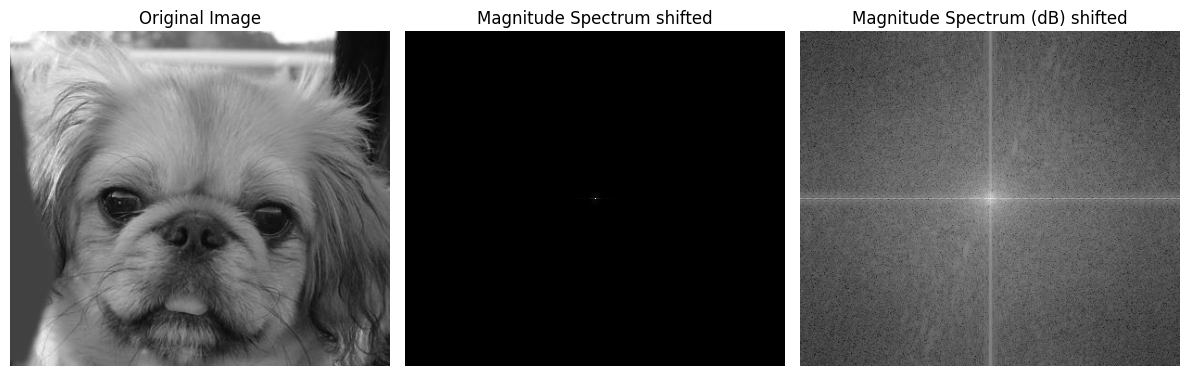

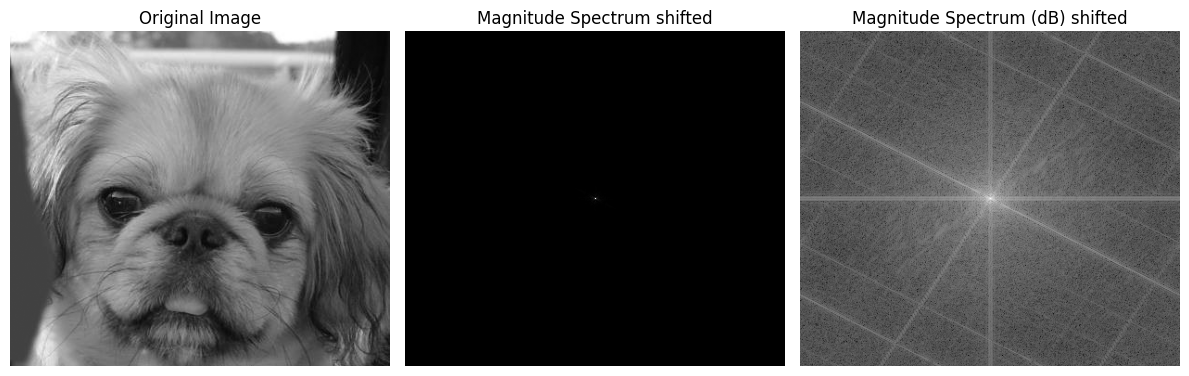

In [ ]:
#Rotating the image 90 degrees anticlockwise and noticing the results we have

doggo_rotated = doggo_gray.rotate(90)

fdog_rot = np.fft.fft2(doggo_rotated)

fshift = np.fft.fftshift(fdog_rot)

magnitude_spectrum_shifted = np.abs(fshift)
magnitude_spectrum_db_shifted = 20 * np.log10(magnitude_spectrum_shifted + 1e-8)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(doggo_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum shifted")
plt.imshow(magnitude_spectrum_shifted, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Magnitude Spectrum (dB) shifted")
plt.imshow(magnitude_spectrum_db_shifted, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

#Rotating the original image by some angle rotates the fourier image also by the same angle.
#For example if I rotated the original image by 60 degrees.

doggo_rotated = doggo_gray.rotate(60)

fdog_rot = np.fft.fft2(doggo_rotated)

fshift = np.fft.fftshift(fdog_rot)

magnitude_spectrum_shifted = np.abs(fshift)
magnitude_spectrum_db_shifted = 20 * np.log10(magnitude_spectrum_shifted + 1e-8)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(doggo_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Magnitude Spectrum shifted")
plt.imshow(magnitude_spectrum_shifted, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Magnitude Spectrum (dB) shifted")
plt.imshow(magnitude_spectrum_db_shifted, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

#Although the main cross has been rotated by 60 degrees there are other crosses as well due to pixel approximation and padding issues.

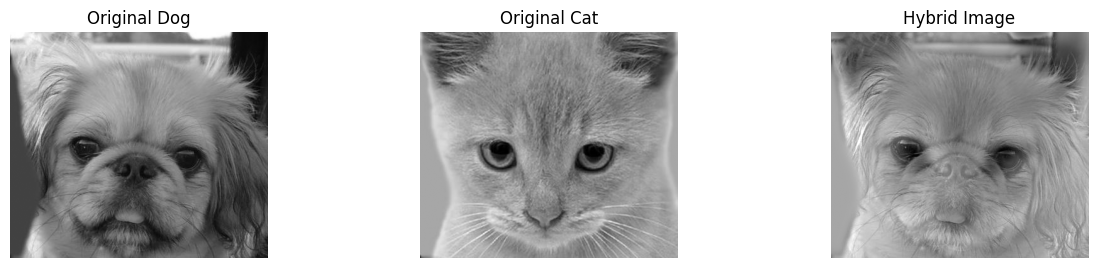

In [ ]:
#Now to fuse the two images such that they give a perceptual illusion, I can take the high frequency portions of any one image say the Dog one and then fuse it with the low frequency regions of the cat one. To get the corresponding frequency regions I can use a low pass filter and would test it using gaussian filter.
from scipy.ndimage import gaussian_filter,laplace

doggo_np = np.array(doggo, dtype=np.float32) / 255.0
meow_np = np.array(meow, dtype=np.float32) / 255.0

#Using the high pass on the pug because it has strong facial features and low pass on the kitten

high_pass_dog= doggo_np-gaussian_filter(doggo_np, 6)
low_pass_meow =  gaussian_filter(meow_np, 8)

hybrid_img = np.clip(high_pass_dog + low_pass_meow, 0, 1)

plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.title("Original Dog")
plt.imshow(doggo, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title("Original Cat")
plt.imshow(meow, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title("Hybrid Image")
plt.imshow(hybrid_img, cmap='gray')
plt.axis('off')

plt.show()






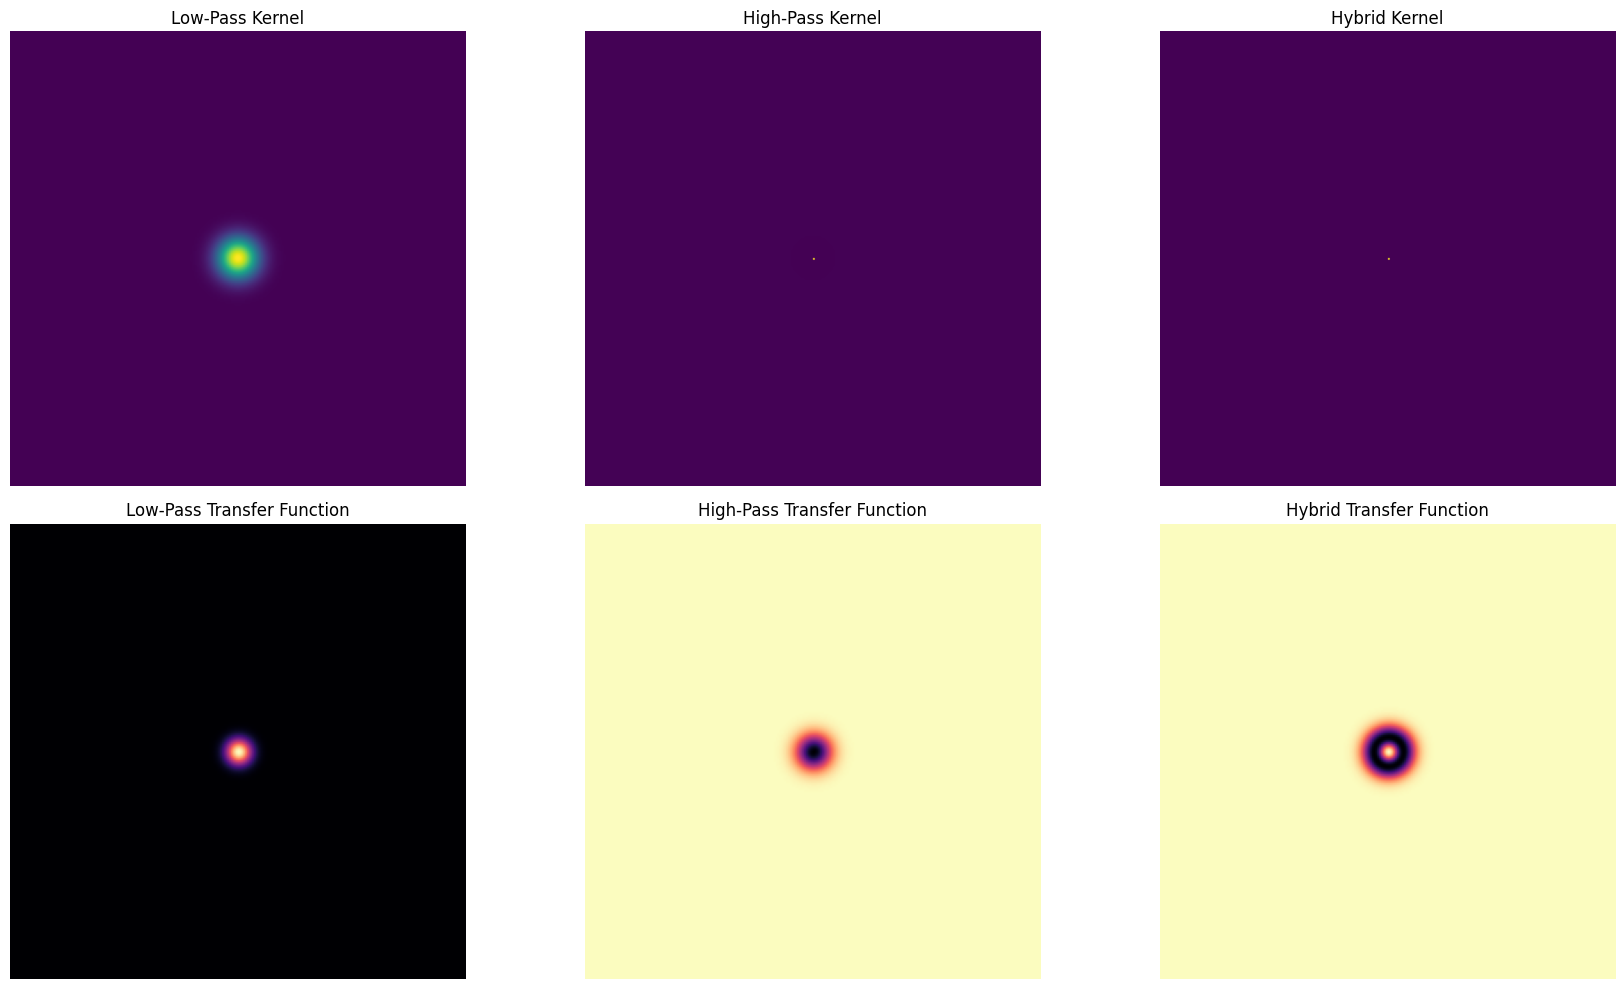

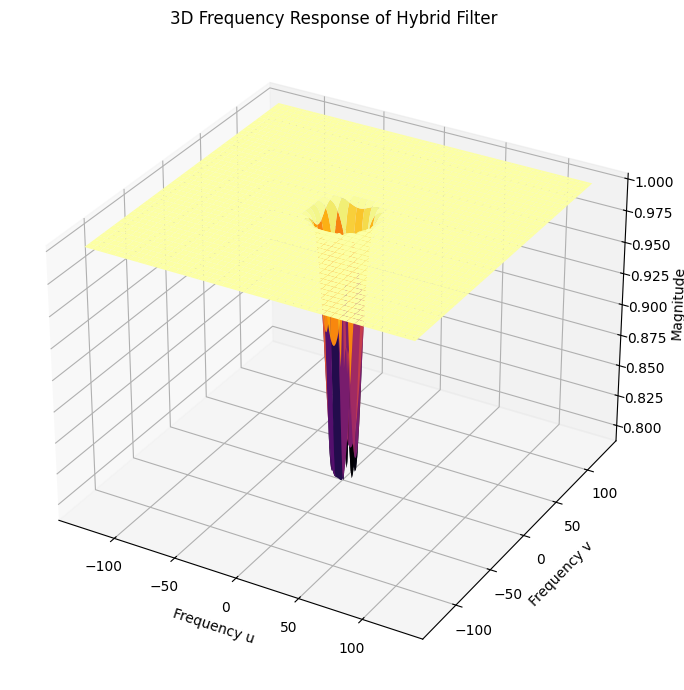

In [ ]:
#Plotting the transfer function for this

from scipy.fft import fft2, fftshift
size = 256
low_sigma = 8
high_sigma = 6

#Creating axes
x = np.linspace(-size//2, size//2, size)
y = np.linspace(-size//2, size//2, size)
X, Y = np.meshgrid(x, y)

# Gaussian Low Pass Filter
def gaussian_kernel(sigma):
    G = np.exp(-(X**2 + Y**2) / (2 * sigma**2))
    return G / np.sum(G)



low_pass_kernel = gaussian_kernel(low_sigma)

#High pass obtained by subtracting from the original image
high_pass_kernel = np.zeros_like(low_pass_kernel)
high_pass_kernel[size//2, size//2] = 1
high_pass_kernel -= gaussian_kernel(high_sigma)

#The net transfer function
hybrid_kernel = low_pass_kernel + high_pass_kernel

#Plotting the 2D fft of this transfer function

def transfer_function(kernel):
    f = fft2(kernel)
    fshift = fftshift(f)
    mag = np.abs(fshift)
    mag /= np.max(mag)
    return mag

low_tf = transfer_function(low_pass_kernel)
high_tf = transfer_function(high_pass_kernel)
hybrid_tf = transfer_function(hybrid_kernel)

#Creating plots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Spatial domain
axes[0, 0].imshow(low_pass_kernel, cmap='viridis')
axes[0, 0].set_title("Low-Pass Kernel")
axes[0, 1].imshow(high_pass_kernel, cmap='viridis')
axes[0, 1].set_title("High-Pass Kernel")
axes[0, 2].imshow(hybrid_kernel, cmap='viridis')
axes[0, 2].set_title("Hybrid Kernel")

# Frequency domain
axes[1, 0].imshow(low_tf, cmap='magma')
axes[1, 0].set_title("Low-Pass Transfer Function")
axes[1, 1].imshow(high_tf, cmap='magma')
axes[1, 1].set_title("High-Pass Transfer Function")
axes[1, 2].imshow(hybrid_tf, cmap='magma')
axes[1, 2].set_title("Hybrid Transfer Function")

for ax in axes.ravel():
    ax.axis('off')
plt.tight_layout()
plt.show()

#3D Plot of Hybrid Transfer Function as it is tough to visualise in 2D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, hybrid_tf, cmap='inferno', linewidth=0, antialiased=True)
ax.set_title("3D Frequency Response of Hybrid Filter")
ax.set_xlabel("Frequency u")
ax.set_ylabel("Frequency v")
ax.set_zlabel("Magnitude")
plt.tight_layout()
plt.show()

